In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from notebookhelper import save_figure
%config InlineBackend.figure_format = 'png'

plt.style.use('seaborn')
sns.set(context="paper")
sns.set(font_scale=1.3)
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
local_fig_dir = "misc"
def save_fig(name, file_type='pdf'):
    save_figure(name, local_fig_dir=local_fig_dir, file_type=file_type)

In [29]:
one_b_word_benchmark = [2014, 17.48, "1B Words Benchmark"] # 4.7 * (4 byte for utf8) * 1000000000 / 1024 / 1024 / 1024 = 17.48
bookcorpus = [2015, 17.24, "BookCorpus"] # 4.7 (mean english word length) * 4 (byte for utf8) * 984846357 / 1024 / 1024 / 1024 = 17.24
giga5 = [2011, 26, "Giga5"] # 26 GB raw
clueweb = [2009, 25600, "ClueWeb09"] # 25 TB * 1024 = 25600 GB
commoncrawl = [2015, 29696, "Common Crawl"] # 29 TB * 1024 = 29696 GB
eng_wiki = [2014, 58, "English Wikipedia"] # 58 GB 
openwebtext = [2019, 12 ,"OpenWebText"] # 12GB raw text

caltech_101 = [2003, 0.13, "Caltech 101"] # 138,6 MB / 1024 = 0.13
caltech_256 = [2007, 1.5, "Caltech 256"] # 1.5GB 
cifar_10    = [2009, 0.18, "CIFAR-10"] # 186,2 MB / 1024 = 0.18
pascal_voc_2009 = [2009, 0.9, "Pascal VOC 2009"] # 920,5 MB / 1024 = 0.898 = 0.9 (http://host.robots.ox.ac.uk/pascal/VOC/voc2009/devkit_doc_14-May-2009.pdf)
pascal_voc_2012 = [2012, 2.0, "Pascal VOC 2012"] # 2GB
imagenet  = [2009, 1341.44, "ImageNet"] # 1.31 TB * 1024 = 1341.44 GB
tinyimage = [2008, 398, "TinyImage"] # 760GB (paper), but real
# Image binary (227Gb), Metadata binary (57Gb), Gist binary (114Gb) = 227 + 171 = 398
ms_coco = [2017, 46.14, "MS COCO"]
# 18GB + 1GB + 6GB + 19GB + 241MB + 1.1GB + 821MB + 5MB = 45.1 GB + 1067 MB = 45.1GB + 1.04 GB = 46.14 GB
openimages_v6 = [2020, 18432, "OpenImages V6"] # 18TB * 1024 = 18432

combined_list = []
combined_list.append(caltech_101)
combined_list.append(caltech_256)
combined_list.append(cifar_10)
combined_list.append(pascal_voc_2009)
combined_list.append(imagenet)
combined_list.append(tinyimage)
combined_list.append(pascal_voc_2012)
combined_list.append(ms_coco)
combined_list.append(openimages_v6)
combined_list.append(clueweb)
combined_list.append(giga5)
combined_list.append(one_b_word_benchmark)
combined_list.append(eng_wiki)
combined_list.append(bookcorpus)
combined_list.append(commoncrawl)
combined_list.append(openwebtext)
combined_np = np.array(combined_list)

concatinated_storage_consumption_df = pd.DataFrame(data=combined_np, \
            index=[i for i in range(combined_np.shape[0])], \
            columns=list(["year", "size-gb", "name"]))
for col_name in concatinated_storage_consumption_df.columns.values[:2]:
    concatinated_storage_consumption_df[col_name] = pd.to_numeric(concatinated_storage_consumption_df[col_name])
concatinated_storage_consumption_df["log-size-gb"] = np.log10(concatinated_storage_consumption_df["size-gb"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16 non-null     int64  
 1   size-gb  16 non-null     float64
 2   name     16 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


,year,size-gb,name,log-size-gb
0,2003,0.13,Caltech 101,-0.886057
1,2007,1.50,Caltech 256,0.176091
2,2009,0.18,CIFAR-10,-0.744727
3,2009,0.90,Pascal VOC 2009,-0.045757
4,2009,1341.44,ImageNet,3.127571
5,2008,398.00,TinyImage,2.599883
6,2012,2.00,Pascal VOC 2012,0.301030
7,2017,46.14,MS COCO,1.664078
8,2020,18432.00,OpenImages V6,4.265572
9,2009,25600.00,ClueWeb09,4.408240


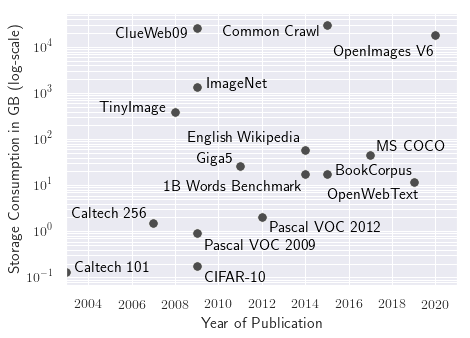

In [124]:
fig, ax = plt.subplots(figsize=(7, 5))
title = ''#'Text Datasets'
xlabel = 'Year of Publication'
ylabel = 'Storage Consumption in GB (log-scale)'

x = "year"
y = "size-gb"
name = "name"
df = concatinated_storage_consumption_df
# Create the scatter plot
plot = sns.scatterplot(x, y, data=df, color="0.3", s=90, legend=False, ax=ax)
# Add text besides each point
for line in range(0, df.shape[0]):
    xoffset = 0.0
    yoffset = 0.2
    if line == 0: # caltech 101
        xoffset = +0.4
        yoffset = 0.0
    if line == 1: # caltech 256
        xoffset = -3.75
        yoffset = +0.5
    if line == 2: # cifar-10
        xoffset = +0.4
        yoffset = -0.1
    if line == 3: # Pascal VOC 2009
        xoffset = +0.4
        yoffset = -0.5
    if line == 4: # Imagenet
        xoffset = +0.5
        yoffset = +0.5
    if line == 6: # Pascal VOC 2012
        xoffset = +0.4
        yoffset = -1
    if line == 5: # TinyImage
        xoffset = -3.5
        yoffset = 0.5
    if line == 7: # MS COCO
        xoffset = +0.3
        yoffset = +10
    if line == 8: # OpenImages
        xoffset = -4.7
        yoffset = -12000
    if line == 9: # ClueWeb
        xoffset = -3.7
        yoffset = -10000
    if line == 10: # Giga
        xoffset = -2
        yoffset = +5
    if line == 11: # 1B Words Benchmark
        xoffset = -6.5
        yoffset = -10
    if line == 12: # English wiki
        xoffset = -5.4
        yoffset = 30
    if line == 13: # BookCorpus
        xoffset = 0.4
        yoffset = 0.0
    if line == 14: # Common Crawl
        xoffset = -4.8
        yoffset = -12000
    if line == 15: # OpenWebText
        xoffset = -4
        yoffset = -7
    plot.text(df[x][line]+xoffset, df[y][line]+yoffset, 
              df[name][line], horizontalalignment='left', 
              size='medium', color='black')
# Set title and axis labels
plt.title(title, fontsize=20)
plt.xlabel(xlabel)
plt.ylabel(ylabel)  
plt.xlim(2003, 2021)
#plt.ylim(-1, 5)
ax.set_yscale('log')
plt.grid(True, which="minor",c='#FFFFFF') 
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$10^{' + str(int(x)) + '}$'))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(list(str(x))[:-2]) ))
save_fig("all-datasets-size", file_type="png")

# Throughput Plots of ResNet50 for different GPUs

In [4]:
combined_info = {
    "name": []
   ,"throughput": []
}

def add_to_combined_info(info_list):
    name = info_list[0]
    throughput = info_list[1]
    combined_info["name"] += [name]
    combined_info["throughput"] += [throughput]

t4 = ["T4"    , 452]
a10 = ["A10"   , 996]
a30 = ["A30"   , 1339]
v100 = ["V100"  , 1393]
a100 = ["A100"  , 2662]
eight_t4 = ["8xT4"  , 3416]
eight_a10 = ["8xA10" , 7283]
eight_a30 = ["8xA30" , 9798]
eight_v100 = ["8xV100", 10479]
eight_a100 = ["8xA100", 20478]
tpuv3 = ["TPUv3", 1050000]

add_to_combined_info(t4)
add_to_combined_info(a10)
add_to_combined_info(a30)
add_to_combined_info(v100)
add_to_combined_info(a100)
add_to_combined_info(eight_t4)
add_to_combined_info(eight_a10)
add_to_combined_info(eight_a30)
add_to_combined_info(eight_v100)
add_to_combined_info(eight_a100)
add_to_combined_info(tpuv3)

gpu_info_df = pd.DataFrame.from_dict(combined_info)
gpu_info_df["throughput"] = pd.to_numeric(gpu_info_df["throughput"])
gpu_info_df["log_throughput"] = np.log10(gpu_info_df["throughput"])

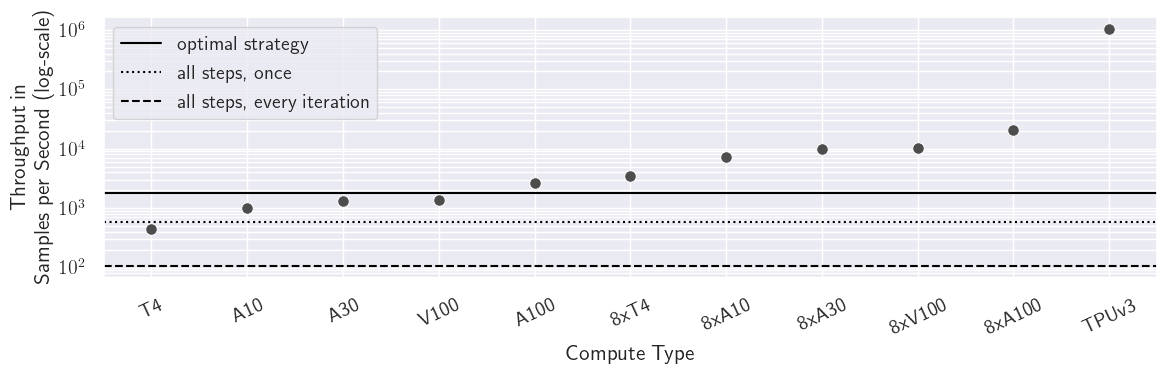

In [6]:
import matplotlib.lines as mlines

fig, ax = plt.subplots(figsize=(12, 4))
title = ''#'Text Datasets'
xlabel = 'Compute Type'
ylabel = 'Throughput in\nSamples per Second (log-scale)'

x = "name"
y = "throughput"
df = gpu_info_df
# Create the scatter plot
plot = sns.scatterplot(x, y, data=df, color="0.3", s=70, legend=False, ax=ax)
plot.set_xticklabels(
        df["name"].to_numpy(), 
        rotation=25
)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
#plt.ylim(-1, 5)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$10^{' + str(x) + '}$'))

full_online = 107 #np.log10(588)
full_offline = 576 #np.log10(798)
our_throughput = 1789 #np.log10(2123)
plot.axhline(full_online, color="black", linestyle='--')
plot.axhline(full_offline, color="black", linestyle=':')
plot.axhline(our_throughput, color="black")

l1 = mlines.Line2D([], [], color='black', linestyle='--', markersize=15, label='all steps, every iteration')
l2 = mlines.Line2D([], [], color='black', linestyle=':', markersize=15, label='all steps, once')
l3 = mlines.Line2D([], [], color='black', markersize=15, label='optimal strategy')
plt.legend(handles=[l3, l2, l1], frameon=True)#, facecolor="white")
ax.set_yscale('log')

plt.grid(True, which="minor",c='#FFFFFF')
plt.tight_layout()
save_fig("gpu-comparison-resnet", file_type="png")